## 导入python库和实验数据集

In [3]:
from IPython.display import Image
%matplotlib inline

 
from sklearn import datasets
import numpy as np
iris = datasets.load_iris() 
#http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
X = iris.data[:, [2, 3]]
y = iris.target  #取species列，类别
print('Class labels:', np.unique(y))
#Output:Class labels: [0 1 2]

Class labels: [0 1 2]


## 数据集切分

把数据集切分成训练集和测试集，这里70%的训练集，30%的测试集

In [5]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)  #train_test_split方法分割数据集
 
print(X_train.shape) #Output:(105, 2)
print(X_test.shape)  #Output:(45, 2)
print(X.shape)  #Output:(150, 2)
print(y_train.shape) #Output:(105,)
print(y_test.shape)  #Output: (45,)


(105, 2)
(45, 2)
(150, 2)
(105,)
(45,)


## 对特征做标准化

非树形模型一般都要对特征数据进行标准化处理，避免数据波动的影响。处理后各维特征有0均值，单位方差。也叫z-score规范化（零均值规范化）。计算方式是将特征值减去均值，除以标准差。

In [6]:
#scaler = sklearn.preprocessing.StandardScaler().fit(train)
#scaler.transform(train);scaler.transform(test)
#fit()方法建模，transform()方法转换
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()   #初始化一个对象sc去对数据集作变换
sc.fit(X_train)   #用对象去拟合数据集X_train，并且存下来拟合参数

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
sc.scale_  #sc.std_同样输出结果

array([1.79595918, 0.77637684])

In [8]:
sc.mean_

array([3.82857143, 1.22761905])

In [9]:

import numpy as np
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#test标准化原理
at=X_train_std[:5]*sc.scale_+sc.mean_
a=X_train[:5]
at==a

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [12]:

X_combined_std = np.vstack((X_train_std, X_test_std))   #shape是(150,2)
y_combined = np.hstack((y_train, y_test))   #shape是(150,)


In [14]:
X_combined_std.shape

(150, 2)

In [15]:
y_combined.shape

(150,)

## 通过plot_decision_region函数可视化，方便直观看分类结果

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
def versiontuple(v):#Numpy版本检测函数
    return tuple(map(int, (v.split("."))))  
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    #画决策边界,X是特征，y是标签，classifier是分类器，test_idx是测试集序号
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
 
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1   #第一个特征取值范围作为横轴
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1   #第二个特征取值范围作为纵轴
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))  #reolution是网格剖分粒度，xx1和xx2数组维度一样
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)   
    #classifier指定分类器，ravel是数组展平；Z的作用是对组合的二种特征进行预测
    Z = Z.reshape(xx1.shape)   #Z是列向量
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)  
    #contourf(x,y,z)其中x和y为两个等长一维数组，z为二维数组，指定每一对xy所对应的z值。
    #对等高线间的区域进行填充（使用不同的颜色）
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)   #全数据集，不同类别样本点的特征作为坐标(x,y)，用不同颜色画散点图
 
    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]   #X_test取测试集样本两列特征，y_test取测试集标签
 
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')   #c设置颜色，测试集不同类别的实例点画图不区别颜色


## 用scikit-learn中的SVM做分类（三类分类）

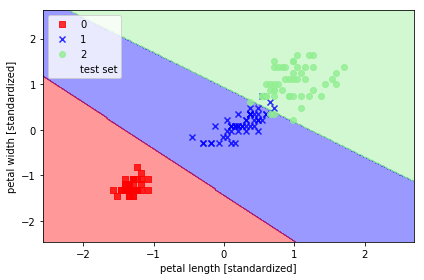

In [16]:
from sklearn.svm import SVC
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
 
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

上图利用的是线性SVM分类，但是从上图可见有些点被分错类了，进一步，考虑利用核函数进行非线性分类

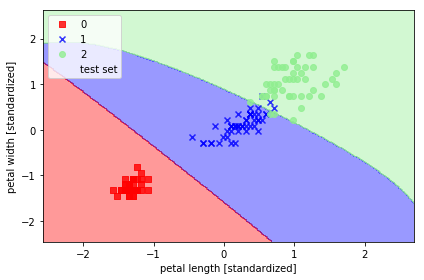

In [17]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',random_state=0,gamma=0.2,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## 用scikit-learn中的决策树做分类（三类分类）

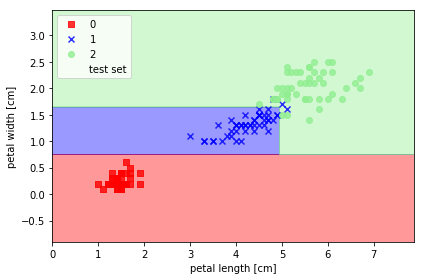

In [18]:
from sklearn.tree import DecisionTreeClassifier
#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
#特征选择的度量，entropy是信息增益；max_depth参数是数的最大深度
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## 用scikit-learn中的随机森林做分类（三类分类）

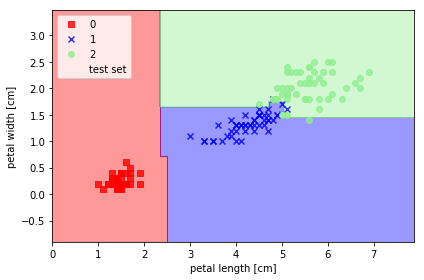

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
#criterion特征选择度量，n_estimators随机森林中单棵树数目，n_jobs设置并行生成树模型得数目
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 用scikit-learn中的k-近邻做分类（三类分类）

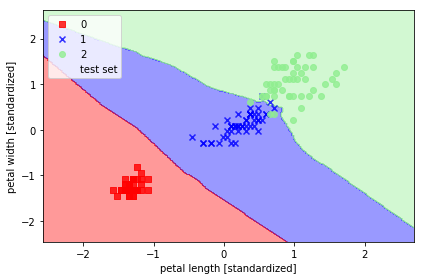

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
#http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
#p是度量范数，metric='minkowski'距离度量标准2范数
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/k_nearest_neighbors.png', dpi=300)
plt.show()